<a href="https://colab.research.google.com/github/mansimht/QOSF-Internship/blob/main/QOSF_Internship_Assessment_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installation of Packages

In [1]:
!pip install qiskit

     |████████████████████████████████| 8.5MB 3.7MB/s 
     |████████████████████████████████| 17.6MB 248kB/s 
     |████████████████████████████████| 204kB 45.0MB/s 
     |████████████████████████████████| 204kB 47.6MB/s 
     |████████████████████████████████| 2.1MB 37.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 1.3MB 38.0MB/s 
     |████████████████████████████████| 5.9MB 33.5MB/s 
     |████████████████████████████████| 194kB 46.1MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 583kB 37.8MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 3.2MB 45.1MB/s 
     |████████████████████████████████| 5.5MB 39.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.6-cp36-none-any.whl size=2883 sha256=dd9090c0f69a814ebedf101c3157e530864bd24c35ba34cc8dd5bd69371c7328
  Stored in directory: /root/.cache/pip/wheels/b1/5e/2a/a9afb84cb4e8a0

In [2]:
!pip install pylatexenc

     |████████████████████████████████| 163kB 4.1MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.8-cp36-none-any.whl size=131377 sha256=8df0028b5c7dfd47df61a886576bc2a28baf9a7b2eebe7cfa435f844315e6ac3
  Stored in directory: /root/.cache/pip/wheels/88/23/90/4cf49f59c1eb67af40a2b3a580536bb5f91d40bc0d4cc8e035
Successfully built pylatexenc


## **Task:1- SWAP Test**

In [3]:
from qiskit import AncillaRegister,QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

In [5]:
q= QuantumRegister(2)
c= ClassicalRegister(2)
qc= QuantumCircuit(q,c)

#q= [0,1] 
qc.h(q[1])
qc.cnot(q[0],q[1])
qc.cnot(q[1],q[0])
qc.cnot(q[0],q[1])
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)

counts = job.result().get_counts(qc)
print(counts)
qc.measure(q,c)

qc.draw()

{'00': 1024}


┌───┐     ┌─┐   
q3_0: ───────■──┤ X ├──■──┤M├───
      ┌───┐┌─┴─┐└─┬─┘┌─┴─┐└╥┘┌─┐
q3_1: ┤ H ├┤ X ├──■──┤ X ├─╫─┤M├
      └───┘└───┘     └───┘ ║ └╥┘
c1: 2/═════════════════════╩══╩═
                           0  1

In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
qc1 = QuantumCircuit(qreg, creg)

qc1.x(qreg[0])

qc1.swap(qreg[0], qreg[1])
qc1.measure(qreg[0], creg[0])
qc1.measure(qreg[1], creg[1])
qc1.draw()

┌───┐   ┌─┐   
q_0: ┤ X ├─X─┤M├───
     └───┘ │ └╥┘┌─┐
q_1: ──────X──╫─┤M├
              ║ └╥┘
c: 2/═════════╩══╩═
              0  1

In [58]:
import numpy as np
from qiskit.visualization import plot_state_qsphere

si= QuantumRegister(1,'si')
phi= QuantumRegister(1,'phi')
a = AncillaRegister(1,'ancilla')
c= ClassicalRegister(1)
qc2= QuantumCircuit(si,phi,a,c)

P= 5  #representing the number of times the algorithm will be executed
for j in range(1,P):
  qc2.h(a[0])       #Apply a Hadamard gate to the ancilla qubit
  #iterating over each pair of qubits in the two registers
  for i in [si,phi]:
    qc2.cswap(a[0],si[0],phi[0])
    qc2.h(a[0])       #Apply a Hadamard gate to the ancilla qubit
    qc2.z(a[0])
    M= qc2.measure(a[0],c[0])
  print(M)
qc2.measure(si[0],c[0])
qc2.measure(phi[0],c[0])
qc2.draw()


#s= 1 - (2/P*np.sum())



»
     si_0: ──────X───────────────X────────────────────X───────────────X──────»
                 │               │                    │               │      »
    phi_0: ──────X───────────────X────────────────────X───────────────X──────»
           ┌───┐ │ ┌───┐┌───┐┌─┐ │ ┌───┐┌───┐┌─┐┌───┐ │ ┌───┐┌───┐┌─┐ │ ┌───┐»
ancilla_0: ┤ H ├─■─┤ H ├┤ Z ├┤M├─■─┤ H ├┤ Z ├┤M├┤ H ├─■─┤ H ├┤ Z ├┤M├─■─┤ H ├»
           └───┘   └───┘└───┘└╥┘   └───┘└───┘└╥┘└───┘   └───┘└───┘└╥┘   └───┘»
    c28: 1/═══════════════════╩═══════════════╩════════════════════╩═════════»
                              0               0                    0         »
«                                                                             »
«     si_0: ──────────────X───────────────X────────────────────X──────────────»
«                         │               │                    │              »
«    phi_0: ──────────────X───────────────X────────────────────X──────────────»
«           ┌───┐┌─┐┌───┐ │ ┌───┐┌───┐┌─┐ │ ┌───┐┌───┐┌─┐┌───┐ │ ┌───┐┌───┐┌─┐»
«ancilla_0: ┤ Z ├┤M├┤ H ├─■─┤ H ├┤ Z ├┤M├─■─┤ H ├┤ Z ├┤M├┤ H ├─■─┤ H ├┤ Z ├┤M├»
«           └───┘└╥┘└───┘   └───┘└───┘└╥┘   └───┘└───┘└╥┘└───┘   └───┘└───┘└╥┘»
«    c28: 1/══════╩════════════════════╩═══════════════╩════════════════════╩═»
«                 0                    0               0                    0 »
«                           ┌─┐   
«     si_0: ─X──────────────┤M├───
«            │              └╥┘┌─┐
«    phi_0: ─X───────────────╫─┤M├
«            │ ┌───┐┌───┐┌─┐ ║ └╥┘
«ancilla_0: ─■─┤ H ├┤ Z ├┤M├─╫──╫─
«              └───┘└───┘└╥┘ ║  ║ 
«    c28: 1/══════════════╩══╩══╩═
«                         0  0  0

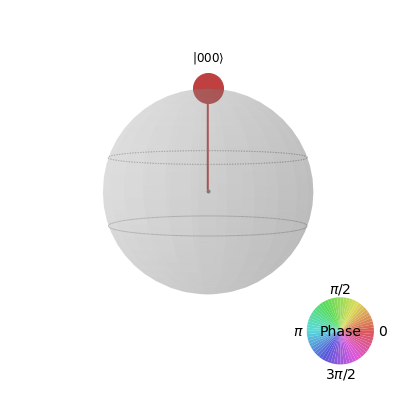

In [44]:
#Representing Swap test output on BlockSphere
job = execute(qc2,Aer.get_backend('statevector_simulator'),shots=1024)
final_state = job.result().get_statevector(qc2)
plot_state_qsphere(final_state)

In [57]:
#Calculate matrix of swap Test
job = execute(qc2, Aer.get_backend('statevector_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_statevector(qc2)
for row in current_unitary:
  print(row)

(1-3.6739403974420584e-16j)
0j
0j
0j
-0j
(-0+0j)
(-0+0j)
(-0+0j)


# **Task:2-Bit-flip code and the sign-flip code**

In [29]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
qc2 = QuantumCircuit(qreg_q, creg_c)

qc2.reset(qreg_q[0])
qc2.reset(qreg_q[1])
qc2.h(qreg_q[0])
qc2.cx(qreg_q[0], qreg_q[1])
qc2.z(qreg_q[0])
qc2.measure(qreg_q[0], creg_c[0])
qc2.measure(qreg_q[1], creg_c[1])
qc2.draw()

┌───┐     ┌───┐┌─┐
q_0: ─|0>─┤ H ├──■──┤ Z ├┤M├
          └───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─|0>──────┤ X ├─┤M├──╫─
               └───┘ └╥┘  ║ 
c: 2/═════════════════╩═══╩═
                      1   0